<a href="https://colab.research.google.com/github/210317/Machine-Learning-and-Deep-Learning-projects/blob/main/Copy_of_Task1_Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
!pip install pandas
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
import opendatasets as od
import pandas as pds
od.download("https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mohamed992002
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors


100%|██████████| 93.9k/93.9k [00:00<00:00, 243MB/s]

In [ ]:
data = pds.read_csv("/content/student-performance-factors/StudentPerformanceFactors.csv")

In [ ]:
# Explore Data
print("Data Overview:")
data.head()
print("\nDataset Statistics:")
print(data.describe())
print("\nChecking for missing values:")
print(data.isnull().sum())

Data Overview:

Dataset Statistics:
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%   

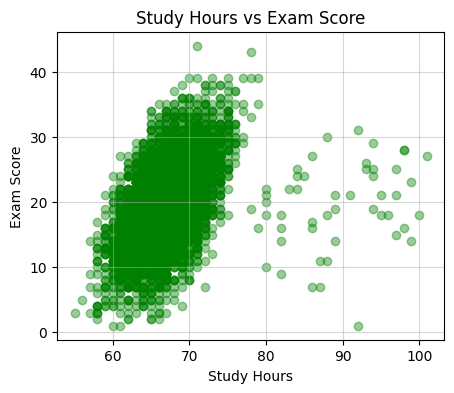

In [ ]:
# visualization relationship
plt.figure(figsize=(5, 4))
plt.scatter(data['Exam_Score'], data['Hours_Studied'], color='green', alpha=0.4)
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True, alpha=0.5)
plt.show()


In [ ]:
# Seperate and prepare data
X = data[['Hours_Studied']].values # features
Y = data['Exam_Score'].values # target
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the model
model = LinearRegression()
model.fit(x_train, y_train)
print(f"\nModel trained successfully!")


Model trained successfully!


In [ ]:
# Make Predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print("\n=== Model Performance ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.4f}")


=== Model Performance ===
Mean Squared Error (MSE): 10.86
Root Mean Squared Error (RMSE): 3.29
Mean Absolute Error (MAE): 2.45
R² Score: 0.2320


In [ ]:
# Visualize the result
plt.figure(figsize=(5, 4))

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

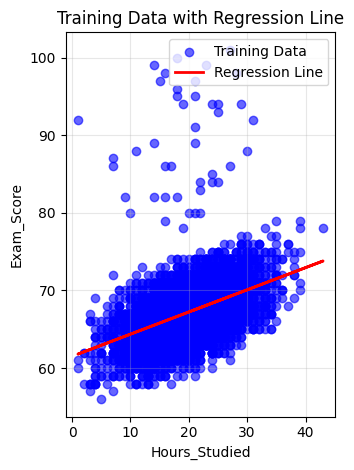

In [ ]:
# Plot1: Trainning data with regresion line
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, color='blue', alpha=0.6, label='Training Data')
plt.plot(x_train, y_pred_train, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Training Data with Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# New data prediction
print("\n=== Making New Predictions ===")
new_study_hours = np.array([[3.5], [7], [9.5]])
predictions = model.predict(new_study_hours)

for hours, score in zip(new_study_hours.flatten(), predictions):
    print(f"If a student studies for {hours} hours, predicted score: {score:.2f}")


=== Making New Predictions ===
If a student studies for 3.5 hours, predicted score: 62.51
If a student studies for 7.0 hours, predicted score: 63.51
If a student studies for 9.5 hours, predicted score: 64.23
